**PREDICTIVE ANALYTICS: CLASSIFICATION ASSIGNMENT BY AINA FARINA**

**Main Objective:** To create a machine learning classification model that identifies whether a person is diabetic or not 

> **1. Import Python Libraries**

In [1]:
##for data manipulation 
import pandas as pd
import numpy as np

##for Classification
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

> **2. Fetch Dataset**

In [2]:
dftest = pd.read_csv('C:/Users/farina/Documents/work/training/14. CADS/07. Advanced Analytics & Machine Learning/Assignment/Classification/test.csv')
dftrain = pd.read_csv('C:/Users/farina/Documents/work/training/14. CADS/07. Advanced Analytics & Machine Learning/Assignment/Classification/train.csv')

## check data
dftrain.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


> **3. Explore Dataset & Pre Processing**

In [3]:
## shape of dataset
dftrain.shape

(614, 10)

In [4]:
## datatype of column and basic info on dataset
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [5]:
## summarize dataset statistical properties

dftrain.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [6]:
##check for null data
print(dftrain.isnull().sum())


p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64


There is no null data. However, features like glucose_concentration, blood_pressure, skin_fold_thickness, serum_insulin and bmi has minimum values of 0 which is not possible. 

We need to replace these 0 data.


In [7]:
# Get the count of Zeros in df 
count = (dftrain == 0).sum()
print('Count of zeros in dataset : ', count)

Count of zeros in dataset :  p_id                       0
no_times_pregnant         90
glucose_concentration      4
blood_pressure            31
skin_fold_thickness      187
serum_insulin            304
bmi                       10
diabetes pedigree          0
age                        0
diabetes                 400
dtype: int64


We observe that there are many data point in the features mentioned above to be at 0, which is not possible. 

To further understand and how to treat this, we first visualise the data to determine skewness.

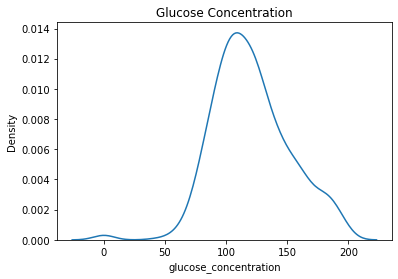

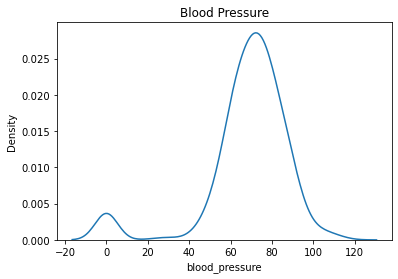

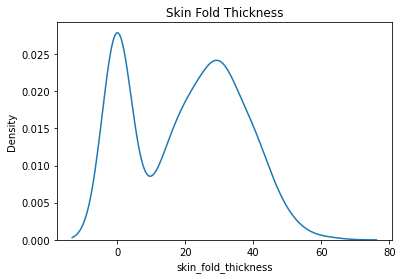

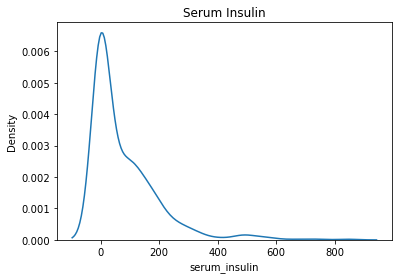

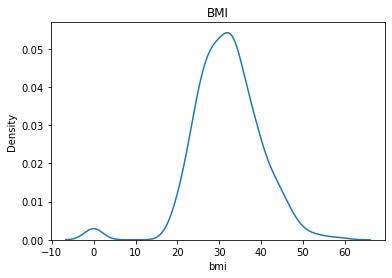

In [8]:
sns.kdeplot(x="glucose_concentration", data=dftrain)
plt.title('Glucose Concentration')
plt.show()

sns.kdeplot(x="blood_pressure", data=dftrain)
plt.title('Blood Pressure')
plt.show()

sns.kdeplot(x="skin_fold_thickness", data=dftrain)
plt.title('Skin Fold Thickness')
plt.show()

sns.kdeplot(x="serum_insulin", data=dftrain)
plt.title('Serum Insulin')
plt.show()

sns.kdeplot(x="bmi", data=dftrain)
plt.title('BMI')
plt.show()


Based on the density graphs, we observe that glucose_concentration, blood_pressure, skin_fold_thickness and bmi are relatively balanced while serum_insulin is highly skewed to the right. Hence we treat the features as below: 

1. glucose_concentration - replace 0 values with **mean** of values
2. blood_pressure - replace 0 values with **mean** of values
3. skin_fold_thickness - replace 0 values with **mean** of values
4. serum_insulin - replace 0 values with **median** of values
5. bmi - replace 0 values with **mean** of values

In [9]:
## Correcting missing value in glucose_concentration
dftrain['glucose_concentration'] = dftrain['glucose_concentration'].replace(0, dftrain['glucose_concentration'].mean())

# Correcting missing values in blood_pressure
dftrain['blood_pressure'] = dftrain['blood_pressure'].replace(0, dftrain['blood_pressure'].mean()) 

# Correct missing values in skin_fold_thickness
dftrain['skin_fold_thickness'] = dftrain['skin_fold_thickness'].replace(0, dftrain['skin_fold_thickness'].mean())

# Correct missing values in serum_insulin
dftrain['serum_insulin'] = dftrain['serum_insulin'].replace(0, dftrain['serum_insulin'].median())

# Correcting missing values in BMI
dftrain['bmi'] = dftrain['bmi'].replace(0, dftrain['bmi'].mean())

In [10]:
## now we have a clean dataset
dftrain.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.327637,72.237345,26.409909,87.771987,32.429641,0.466342,33.325733,0.348534
std,223.603024,3.358126,29.686231,12.057890,9.448218,112.204995,6.873273,0.331090,11.929569,0.476895
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,100.000000,64.000000,20.244300,17.000000,27.500000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.500000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


Count of zeros in dataset :  p_id                       0
no_times_pregnant         90
glucose_concentration      0
blood_pressure             0
skin_fold_thickness        0
serum_insulin              0
bmi                        0
diabetes pedigree          0
age                        0
diabetes                 400
dtype: int64


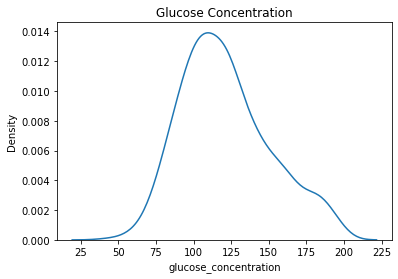

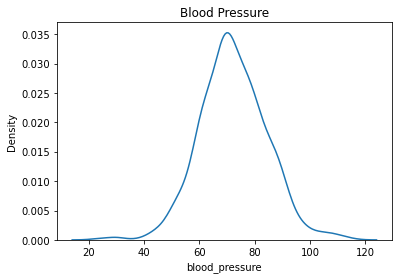

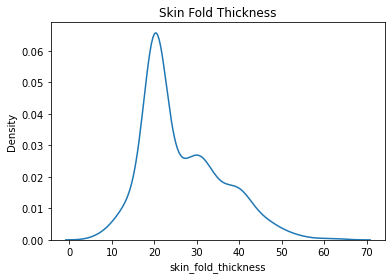

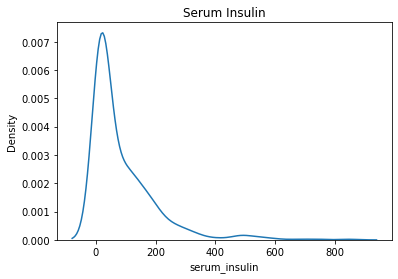

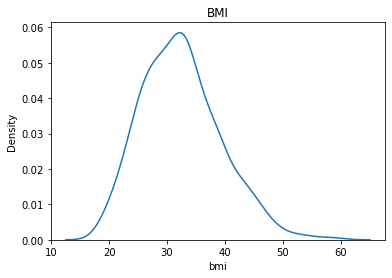

In [11]:
# checking purposes
count = (dftrain == 0).sum()
print('Count of zeros in dataset : ', count)

#visualise the features
sns.kdeplot(x="glucose_concentration", data=dftrain)
plt.title('Glucose Concentration')
plt.show()

sns.kdeplot(x="blood_pressure", data=dftrain)
plt.title('Blood Pressure')
plt.show()

sns.kdeplot(x="skin_fold_thickness", data=dftrain)
plt.title('Skin Fold Thickness')
plt.show()

sns.kdeplot(x="serum_insulin", data=dftrain)
plt.title('Serum Insulin')
plt.show()

sns.kdeplot(x="bmi", data=dftrain)
plt.title('BMI')
plt.show()

>**4. Exploratory Data Analysis**

**Pairplot visualisation of features**

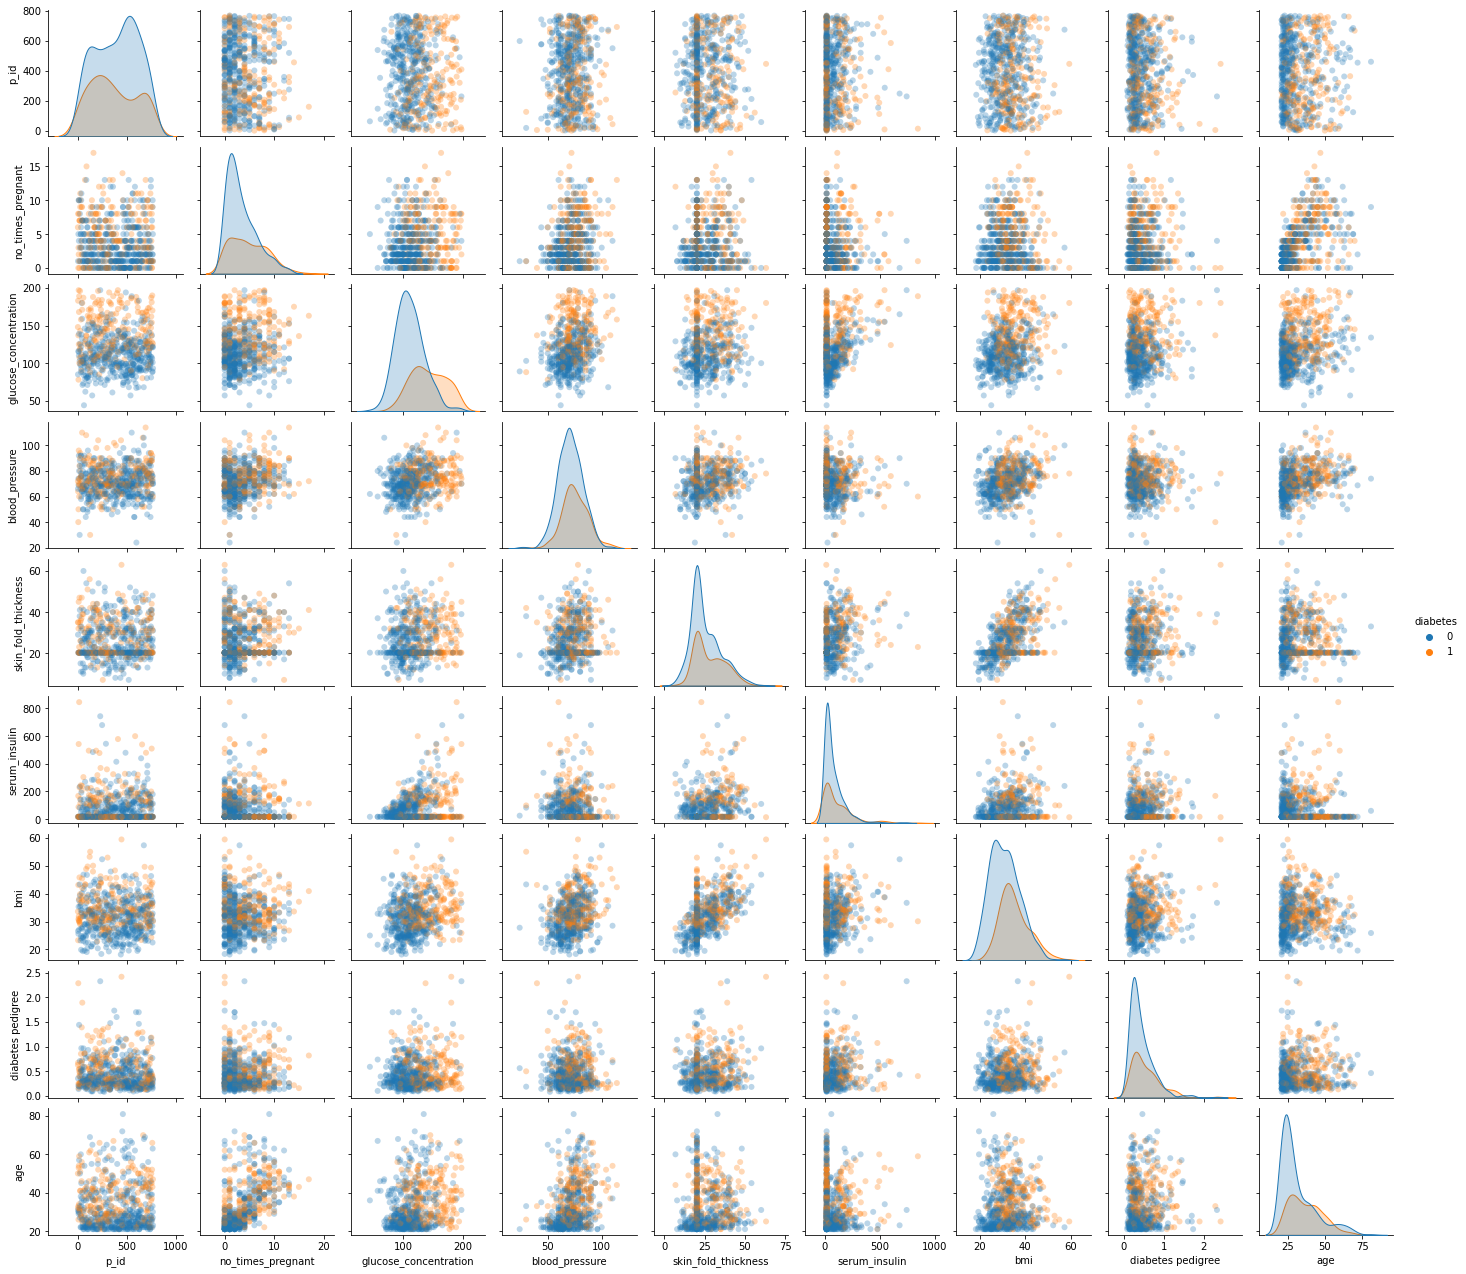

In [12]:
sns.pairplot(dftrain, hue='diabetes', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)


From the pairplot, we observe that no pairs of feature can differentiate if a person has diabetes or not. A combination of several features would be more likely to help predict diabetes. 

**Correlation**

In [13]:
dftrain.corr()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,1.000000,-0.034607,-0.006343,0.050800,0.003698,0.010100,-0.017529,-0.052759,0.020156,-0.071237
no_times_pregnant,-0.034607,1.000000,0.125165,0.211436,0.017747,-0.083409,0.000783,-0.005811,0.534231,0.209196
glucose_concentration,-0.006343,0.125165,1.000000,0.250918,0.133515,0.345299,0.248671,0.136111,0.247503,0.502510
blood_pressure,0.050800,0.211436,0.250918,1.000000,0.139085,-0.038142,0.280906,-0.008180,0.323273,0.181257
skin_fold_thickness,0.003698,0.017747,0.133515,0.139085,1.000000,0.290825,0.562355,0.153253,-0.000735,0.138617
serum_insulin,0.010100,-0.083409,0.345299,-0.038142,0.290825,1.000000,0.189836,0.172565,-0.038323,0.125933
bmi,-0.017529,0.000783,0.248671,0.280906,0.562355,0.189836,1.000000,0.135509,0.016509,0.297106
diabetes pedigree,-0.052759,-0.005811,0.136111,-0.008180,0.153253,0.172565,0.135509,1.000000,0.053637,0.173301
age,0.020156,0.534231,0.247503,0.323273,-0.000735,-0.038323,0.016509,0.053637,1.000000,0.221736
diabetes,-0.071237,0.209196,0.502510,0.181257,0.138617,0.125933,0.297106,0.173301,0.221736,1.000000


<AxesSubplot:>

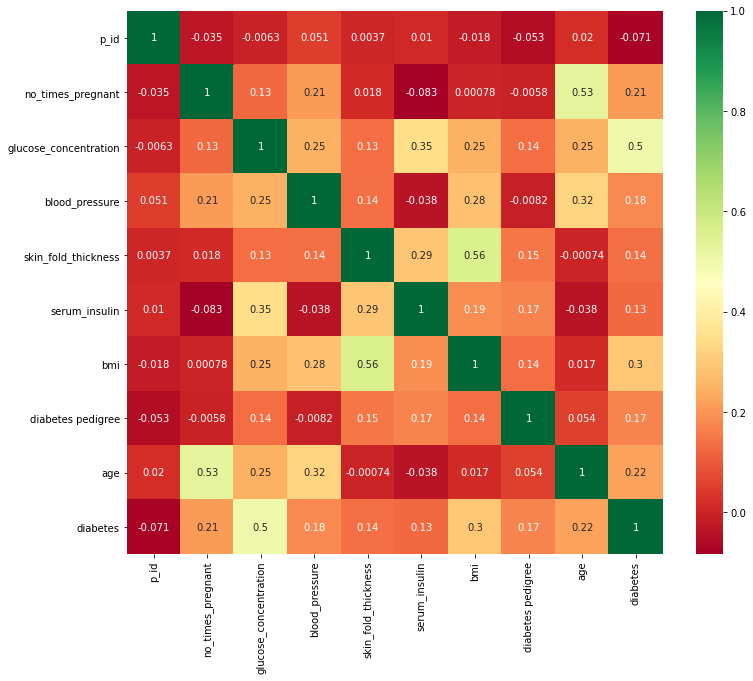

In [14]:
plt.figure(figsize=(12,10)) 
sns.heatmap(dftrain.corr(), annot=True, cmap ='RdYlGn')

>**5. Data Modelling**

Data Scaling

In [15]:
scaling_x = StandardScaler()

x =  pd.DataFrame(scaling_x.fit_transform(dftrain.drop(["p_id","diabetes"],axis = 1),), columns=['no_times_pregnant', 
'glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree', 'age'])

x.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,-0.552371,-0.314464,-0.351703,-0.467126,0.055551,0.243221,-0.457475,-0.614583
1,2.129880,0.730643,1.806319,0.698064,0.519366,0.607245,-0.641865,1.482759
2,-0.552371,-0.955013,-0.683707,0.592138,0.644240,0.811098,0.627706,-0.866264
3,-0.850399,-0.044759,0.644307,2.286960,1.001021,0.942147,2.102825,0.643822
4,-0.254343,0.224946,-0.019700,-0.149347,0.911825,-0.004316,0.249857,-0.530689


Data Splitting

In [16]:
y = dftrain["diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 8), (123, 8), (491,), (123,))

In [18]:
y_test.head()

285    1
323    1
482    0
173    0
518    1
Name: diabetes, dtype: int64

**Decision tree**

In [19]:
#building model
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

#Accuracy score
dtree_predictions = dtree.predict(x_test)
print("Accuracy Score =", dtree.score(x_test, y_test))

#classification report
print(classification_report(y_test,dtree_predictions))

Accuracy Score = 0.7154471544715447
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        79
           1       0.60      0.61      0.61        44

    accuracy                           0.72       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



**Random Forest**

In [20]:
#building model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

#Accuracy score
rfc_predict = rfc.predict(x_test)
print("Accuracy Score =", rfc.score(x_test, y_test))

#classification report 
print(classification_report(y_test,rfc_predict))

Accuracy Score = 0.8130081300813008
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        79
           1       0.78      0.66      0.72        44

    accuracy                           0.81       123
   macro avg       0.80      0.78      0.79       123
weighted avg       0.81      0.81      0.81       123



**Logistic Regression**

In [21]:
#building model
lgr = LogisticRegression(max_iter=300)
lgr.fit(x_train, y_train)

#Accuracy score
lgr_predict = lgr.predict(x_test)
print("Accuracy Score =", lgr.score(x_test, y_test))

#classification report
print(classification_report(y_test,lgr_predict))

Accuracy Score = 0.8373983739837398
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        79
           1       0.83      0.68      0.75        44

    accuracy                           0.84       123
   macro avg       0.84      0.80      0.81       123
weighted avg       0.84      0.84      0.83       123



**K-Nearest Neighbor**

In [22]:
#building model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#Accuracy score
knn_predict = knn.predict(x_test)
print("Accuracy Score =", knn.score(x_test, y_test))

#classification report
print(classification_report(y_test,knn_predict))

Accuracy Score = 0.7804878048780488
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        79
           1       0.74      0.59      0.66        44

    accuracy                           0.78       123
   macro avg       0.77      0.74      0.75       123
weighted avg       0.78      0.78      0.77       123



**Support Vector Machine**

In [23]:
#building model
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

#Accuracy score
svc_predict = svc.predict(x_test)
print("Accuracy Score =", svc.score(x_test, y_test))

#classification report
print(classification_report(y_test,svc_predict))

Accuracy Score = 0.8048780487804879
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        79
           1       0.83      0.57      0.68        44

    accuracy                           0.80       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.81      0.80      0.79       123



In [24]:
print("Decision Tree Accuracy Score =", dtree.score(x_test, y_test))
print("Random Forest Accuracy Score =", rfc.score(x_test, y_test))
print("Logistic Regression Accuracy Score =", lgr.score(x_test, y_test))
print("KNN Accuracy Score =", knn.score(x_test, y_test))
print("SVM Accuracy Score =", svc.score(x_test, y_test))

Decision Tree Accuracy Score = 0.7154471544715447
Random Forest Accuracy Score = 0.8130081300813008
Logistic Regression Accuracy Score = 0.8373983739837398
KNN Accuracy Score = 0.7804878048780488
SVM Accuracy Score = 0.8048780487804879


As observed, **Logistic Regression** is the best model for this prediction since it has the highest accuracy score

>**6. Prediction**

Since our best model is Logistic Regression, we will predict the test dataset with this model

In [25]:
#establish test dataset
x2_test= dftest.drop(["p_id"],axis=1)
x2_test.head()
x2_test.shape, y_test.shape

((154, 8), (123,))

In [26]:
#standardise dataset
x2_test_sub=x2_test.iloc[:123]
x2_test_sub.shape, y_test.shape

((123, 8), (123,))

In [27]:
#predict test set with Random Forest model 

y_pred = lgr.predict(x2_test_sub)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.36      1.00      0.53        44

    accuracy                           0.36       123
   macro avg       0.18      0.50      0.26       123
weighted avg       0.13      0.36      0.19       123



C:\Users\farina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
x2_test_sub['pred'] = y_pred
print(x2_test_sub)

     no_times_pregnant  glucose_concentration  blood_pressure  \
0                   12                    140              85   
1                    6                    102              90   
2                    7                     97              76   
3                    7                    179              95   
4                    6                     87              80   
..                 ...                    ...             ...   
118                  5                    116              74   
119                  1                    107              50   
120                 11                    135               0   
121                  1                    100              74   
122                  6                    165              68   

     skin_fold_thickness  serum_insulin   bmi  diabetes pedigree  age  pred  
0                     33              0  37.4              0.244   41     1  
1                     39              0  35.7              0.67

<ipython-input-28-1c3906001601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_test_sub['pred'] = y_pred


In conclusion, though Random Forest model had the highest accuracy score when using train dataset, the model achieved a fairly low significant accuracy score when predicting using the test dataset of 0.36. 

However, in a medical diagnosis point of view, this model cannot be used to accurately predict and diagnose a petient of diabetes. 